# SD212: Graph mining
## Lab 3: Graph structure

In this lab, you will learn to:
* work with **sparse matrices**,
* highlight the **small-world property** of a graph,
* estimate the **clustering coefficient** of a graph,
* generate a **Watts-Strogatz** graph with both the small-world property and a high clustering coefficient.

## Import

In [1]:
import networkx as nx

The documentation is available [here](https://networkx.readthedocs.io/en/stable/).

In [2]:
import numpy as np

In [3]:
from scipy import sparse as sp

In [4]:
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import warnings
warnings.filterwarnings('ignore')

## Datasets

You will need the following datasets:
* [Openflights](http://perso.telecom-paristech.fr/~bonald/graphs/openflights.graphml.gz)<br>
Graph of the main international flights. Nodes are airports. The graph is undirected (all flights are bidirectional). Weights correspond to the number of daily flights between airports. Extracted from [Openflights](http://openflights.org).
* [Wikipedia for schools](http://perso.telecom-paristech.fr/~bonald/graphs/wikipedia_schools.graphml.gz)<br> Graph of the hyperlinks between a subset of the pages of the English Wikipedia. The graph is directed and unweighted.
More information [here](https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_for_Schools)
* [Actors-Movies](http://perso.telecom-paristech.fr/~bonald/graphs/actors_movies.graphml.gz)<br>
Graph between actors and movies (a link exists if the actor stars in the movie). The graph is bipartite (see the field 'type' of each node). 
Extracted from [YaGo](http://yago-knowledge.org).



## 1. Sparse matrices

You will work with adjacency matrices in [scipy CSR format](https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html).

In [10]:
# A simple graph
graph = nx.erdos_renyi_graph(10, 0.4)

[]

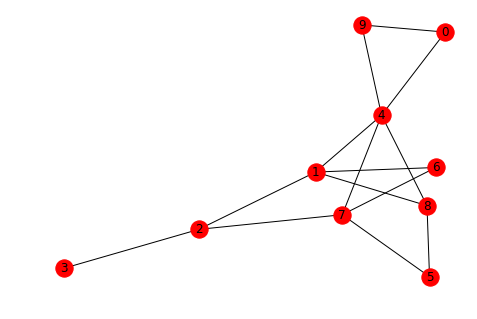

In [26]:
plt.figure()
nx.draw(graph, with_labels= True)
plt.plot()

In [13]:
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 10
Number of edges: 15
Average degree:   3.0000


In [15]:
# Density
n = graph.number_of_nodes()
m = graph.number_of_edges()
density = 2 * m / n / (n - 1)
print(density)

0.3111111111111111


In [16]:
# Dense adjacency matrix (numpy array)
adjacency = nx.to_numpy_array(graph)

In [17]:
adjacency

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 1., 0., 1., 0., 1., 0.],
       [0., 1., 0., 1., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 0.],
       [0., 1., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 1., 1., 1., 0., 0., 0.],
       [0., 1., 0., 0., 1., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

In [18]:
np.sum(adjacency)/(len(adjacency)**2 - len(adjacency))

0.3111111111111111

In [23]:
get_clustering_coefficient(adjacency)

0.01875

In [28]:
get_local_clustering_coefficient(adjacency, 1)

1.0

## CSR format

In [23]:
# Sparse adjacency matrix (scipy csr matrix)
adjacency = nx.to_scipy_sparse_matrix(graph)

In [24]:
adjacency

<10x10 sparse matrix of type '<class 'numpy.int64'>'
	with 30 stored elements in Compressed Sparse Row format>

In [25]:
adjacency.todense()

matrix([[0, 0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 1, 0, 1],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
        [0, 1, 0, 0, 0, 0, 0, 0, 0, 1],
        [0, 0, 0, 0, 0, 1, 0, 0, 1, 1],
        [1, 0, 0, 0, 1, 0, 0, 1, 0, 1],
        [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 0, 0, 1, 0, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 0, 1, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 1, 0, 0]], dtype=int64)

In [26]:
# Data
adjacency.data

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [27]:
# Indices (columns)
adjacency.indices

array([5, 6, 3, 7, 9, 7, 9, 1, 9, 5, 8, 9, 0, 4, 7, 9, 0, 1, 2, 5, 8, 9,
       4, 7, 1, 2, 3, 4, 5, 7], dtype=int32)

In [28]:
# Index pointers (rows)
adjacency.indptr

array([ 0,  2,  5,  7,  9, 12, 16, 17, 22, 24, 30], dtype=int32)

In [29]:
len(adjacency.indptr)

11

In [30]:
len(adjacency.indices)

30

## To do

* Generate a new random graph of 10 nodes
* Get the corresponding adjacency matrix as numpy array
* Guess the first 3 entries and the last 3 entries of each vector of the adjacency matrix in ```scipy csr format```: ```data, indices, indptr```
* Check your guess.

In [34]:
graph = nx.erdos_renyi_graph(10, 0.3)
adj = nx.to_numpy_array(graph)
print(adj)

adj = nx.to_scipy_sparse_matrix(graph)
print(adj.data, adj.indices, adj.indptr, sep="\n")

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 1. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 1. 0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 0.]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[6 4 5 6 7 8 3 9 2 6 1 1 0 1 3 7 1 6 1 9 2 8]
[ 0  1  6  8 10 11 12 16 18 20 22]


## Using sparse matrices

In [7]:
def get_degrees(adjacency):
    n = adjacency.shape[0]
    return adjacency.dot(np.ones(n, dtype = int))

In [55]:
get_degrees(adjacency)

array([3, 2, 3, 5, 3, 4, 5, 1, 4, 0], dtype=int64)

In [8]:
def get_neighbors(adjacency, node):
    n = adjacency.shape[0]
    unit_vector = np.zeros(n, dtype = int)
    unit_vector[node] = 1
    return adjacency.dot(unit_vector)

In [57]:
get_neighbors(adjacency, 0)

array([0, 0, 0, 1, 0, 0, 0, 1, 1, 0], dtype=int64)

## To do

* Write a function computing the distances from any given node (see below).<br>
Use distance -1 for nodes that are not accessible.

In [9]:
def get_distances(adjacency, node, verbose = False):
    n = adjacency.shape[0]
    distances = -np.ones(n, dtype = int)
    distances[node] = 0
    visited = np.zeros(n, dtype = int)
    visited[node] = 1
    
    i = 1
    while 1:
        if verbose:
            print(i, visited, sep = " : ")
            print(i, distances, sep = " : ")
        temp = ((adjacency.dot(visited) + visited) != 0)
        
        if np.sum(visited) == np.sum(temp):
            break
        
        distances[(temp + -1*visited) != 0] = i
        
        visited = temp
        i += 1
        
    return distances

In [54]:
get_distances(adj, 0, verbose = True)

1 : [1 0 0 0 0 0 0 0 0 0]
1 : [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1]
2 : [ True False False False False False  True False False False]
2 : [ 0 -1 -1 -1 -1 -1  1 -1 -1 -1]
3 : [ True  True False  True False False  True  True False False]
3 : [ 0  2 -1  2 -1 -1  1  2 -1 -1]
4 : [ True  True  True  True  True  True  True  True  True False]
4 : [ 0  2  3  2  3  3  1  2  3 -1]
5 : [ True  True  True  True  True  True  True  True  True  True]
5 : [0 2 3 2 3 3 1 2 3 4]


array([0, 2, 3, 2, 3, 3, 1, 2, 3, 4])

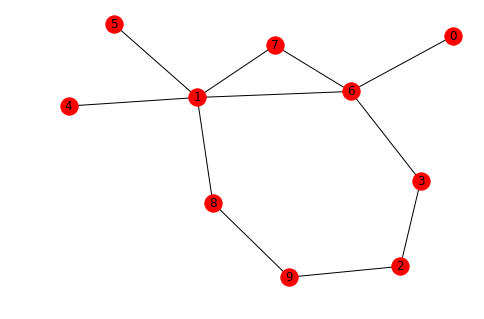

In [42]:
nx.draw(graph, with_labels = True)

## 2. Small-world property

You will now make a few experiments highlighting the small-world property.

## To do

* Which fraction of the airports can be reached from Paris Charles de Gaulle in 1, 2, 3 flights?
* Which fraction of the pages are accessible from Paris in 1, 2, 3 clicks on Wikipedia for Schools?

In [10]:
openflights = nx.read_graphml("../openflights.graphml", node_type = int)

In [11]:
weighted_adjacency = nx.to_scipy_sparse_matrix(openflights)
adjacency = nx.to_scipy_sparse_matrix(openflights, weight = None)

In [12]:
# Get node from (partial) name

def get_node_from_name(graph, name):
    list_nodes = []
    for u in graph.nodes():
        if graph.node[u]['name'].find(name) >= 0:
            list_nodes.append(u)
    return list_nodes

for u in get_node_from_name(openflights, 'Charles de Gaulle'):
    print (u,openflights.node[u]['name'])

622 Charles de Gaulle International Airport


In [81]:
print(np.sum(get_neighbors(adjacency, 622))/adjacency.shape[0])
print(np.sum(adjacency.dot(get_neighbors(adjacency, 622)) != 0)/adjacency.shape[0])
print(np.sum(adjacency.dot(adjacency.dot(get_neighbors(adjacency, 622))) != 0)/adjacency.shape[0])

0.07523409751372295
0.6189861155957378
0.9089441394898289


In [82]:
openflights.node[0]

{'name': 'Goroka Airport', 'pos_x': 145.391998291, 'pos_y': -6.08168983459}

In [13]:
wikipedia = nx.read_graphml("../wikipedia_schools.graphml", node_type = int)
adjacency = nx.to_scipy_sparse_matrix(wikipedia, weight = None).T

In [143]:
for u in get_node_from_name(wikipedia, 'Paris'):
    print (u, wikipedia.node[u]['name'])

46 Paris


In [144]:
print(np.sum(get_neighbors(adjacency, 46))/adjacency.shape[0])
print(np.sum(adjacency.dot(get_neighbors(adjacency, 46)) != 0)/adjacency.shape[0])
print(np.sum(adjacency.dot(adjacency.dot(get_neighbors(adjacency, 46))) != 0)/adjacency.shape[0])

0.024395556523633195
0.37813112611631455
0.7645393160531475


## To do

Plot the histogram of the distance between two random airports sampled:
1. uniformly
2. in proportion to their degrees
3. in proportion to their traffics

Use 100 samples per histogram.

Interpret the results.

**Hint:** For 2 and 3, use the parameter ```p``` of the function ```np.random.choice```.

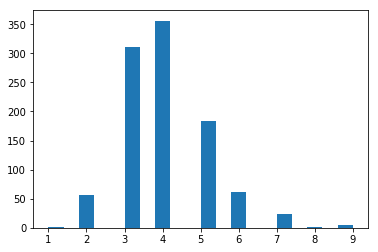

In [101]:
adjacency = nx.to_scipy_sparse_matrix(openflights, weight = None)
# Two random airports, uniform sampling
h = []
for i in range(1000):
    airports = list(openflights.nodes())
    u,v = np.random.choice(airports, size = 2, replace = False)
    h.append(nx.shortest_path_length(openflights, u, v))

plt.hist(h, bins = 20)
plt.show()

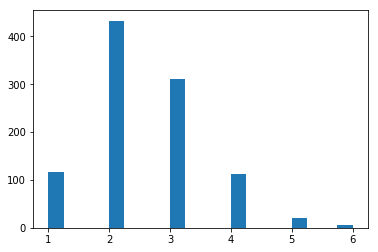

In [102]:
h = []
p = get_degrees(adjacency)
p = p/np.sum(p)
for i in range(1000):
    airports = list(openflights.nodes())
    u,v = np.random.choice(airports, size = 2, replace = False, p = p)
    h.append(nx.shortest_path_length(openflights, u, v))

plt.hist(h, bins = 20)
plt.show()

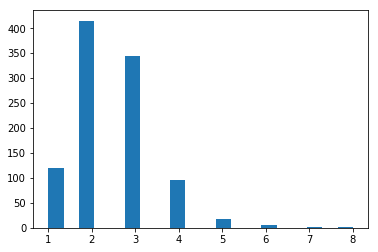

In [103]:
h = []
p = get_degrees(weighted_adjacency)
p = p/np.sum(p)
for i in range(1000):
    airports = list(openflights.nodes())
    u,v = np.random.choice(airports, size = 2, replace = False, p = p)
    h.append(nx.shortest_path_length(openflights, u, v))

plt.hist(h, bins = 20)
plt.show()

## To do

* Find two airports with degree of separation higher than 8, and show the corresponding path on a map.
* Plot the histograms of the distances from each of these airports to all other airports.

In [104]:
a = get_distances(adjacency, 622)
farest = np.argmax(a)
print(a[farest])

a = get_distances(adjacency, farest)
farest_bis = np.argmax(a)
print(a[farest_bis])

7
12


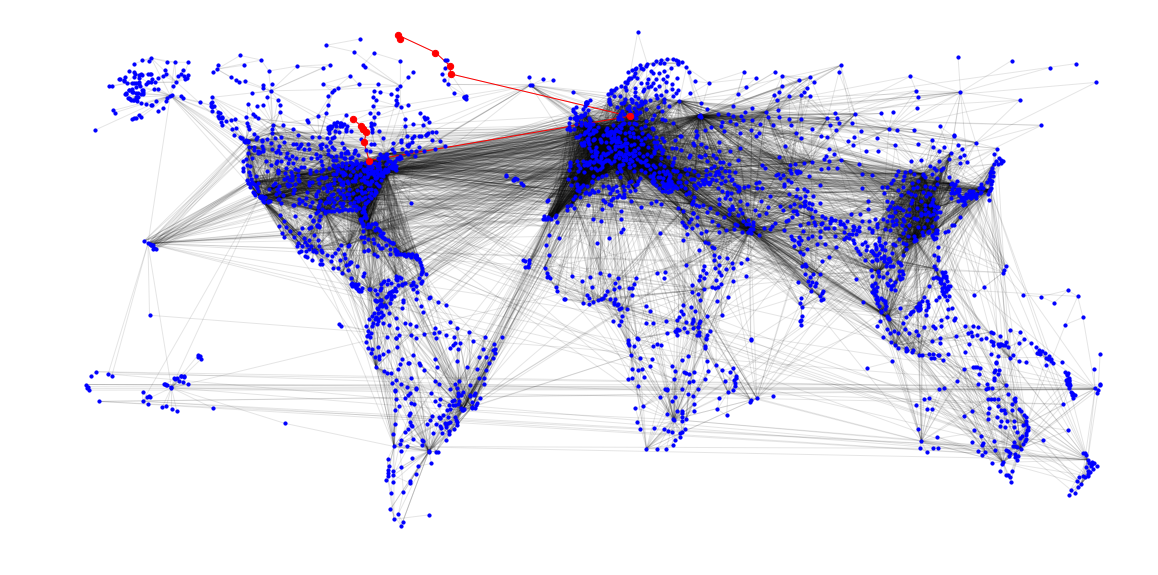

In [105]:
path = nx.shortest_path(openflights, farest, farest_bis)
edges = [(path[i], path[i+1]) for i in range(len(path)-1)]

# Get positions
pos_x = nx.get_node_attributes(openflights,'pos_x')
pos_y = nx.get_node_attributes(openflights,'pos_y')
pos = {u: (pos_x[u], pos_y[u]) for u in openflights.nodes()}

# Visualization
plt.figure(figsize=(20,10))
plt.axis('off')
nx.draw_networkx_nodes(openflights, pos, node_size = 10, node_color = 'b')
nx.draw_networkx_nodes(openflights, pos, node_size = 40, nodelist = path, node_color = 'r')
nx.draw_networkx_edges(openflights, pos, alpha = .1)
nx.draw_networkx_edges(openflights, pos, edgelist = edges, edge_color = "r")
plt.show()

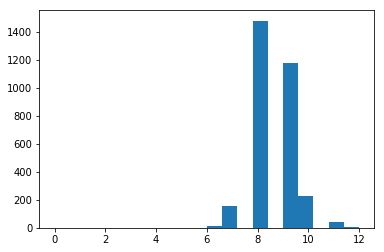

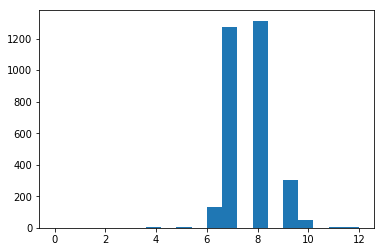

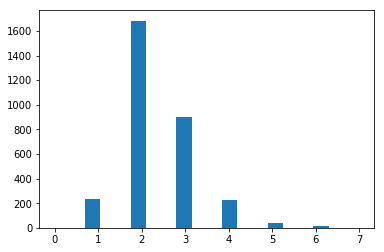

In [109]:
distance = get_distances(adjacency, farest)
plt.hist(distance, bins = 20)
plt.show()

distance = get_distances(adjacency, farest_bis)
plt.hist(distance, bins = 20)
plt.show()

distance = get_distances(adjacency, 622)
plt.hist(distance, bins = 20)
plt.show()

## To do

* Plot the histogram of the distances **from** Plato **to** any other page in Wikipedia for Schools (provided a path exists).
* Plot the histogram of the distances **to** Plato **from** any other page in Wikipedia for Schools (provided a path exists).

In [145]:
adjacency = nx.to_scipy_sparse_matrix(wikipedia, weight = None)

In [117]:
adjacency.todense()[:10,:10]

matrix([[0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 1, 0, 0, 0, 1],
        [0, 1, 1, 0, 1, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 0, 1, 1, 0, 1, 1],
        [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 1],
        [0, 1, 1, 1, 0, 1, 0, 0, 1, 0]], dtype=int64)

In [125]:
wikipedia[0]

AtlasView({1: {}, 2: {}, 3: {}, 4: {}, 5: {}, 6: {}, 7: {}, 8: {}, 9: {}, 10: {}, 11: {}})

In [136]:
for u in get_node_from_name(wikipedia, 'Plato'):
    print (u, wikipedia.node[u]['name'])

245 Plato


1

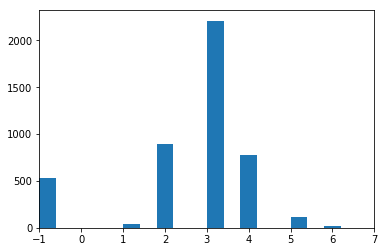

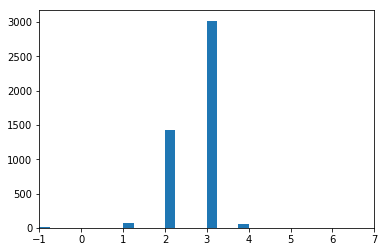

In [160]:
from_plato = get_distances(adjacency.T, 245)
plt.hist(from_plato, bins = 20)
plt.xlim(-1,7)
plt.show()

to_plato = get_distances(adjacency, 245)
plt.xlim(-1,7)
plt.hist(to_plato, bins = 20)
plt.show()


## To do

* Plot the histogram of the [Bacon number](https://fr.wikipedia.org/wiki/Six_Degrees_of_Kevin_Bacon) of actors (**without** building the co-starring actor graph).

2496 Francis Bacon


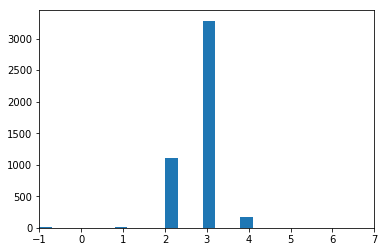

In [161]:
for u in get_node_from_name(wikipedia, 'Bacon'):
    print (u, wikipedia.node[u]['name'])

to_bacon = get_distances(adjacency, 2496)
plt.hist(to_bacon, bins = 20)
plt.xlim(-1,7)
plt.show()

## 3. Clustering coefficient

You will now learn to compute the clustering coefficient of a graph.

## To do

* Show that the clustering coefficient of node $u$ is equal to:
$$
C_u = \frac {N_u}{d_u(d_u-1)}
$$
where $N_u$ is the total number of paths of length 2 from $u$ to a neighbor of $u$.
* Write a function to compute the clustering coefficient of a node (see below).
* Deduce the clustering coefficient of the graph, given by:
$$
C = \frac{\sum_u d_u(d_u -1)C_u}{\sum_u d_u(d_u -1)}.
$$
* Compute the clustering coefficient of Openflights and Wikipedia for Schools (seen as an undirected graph).
* Compare your results with those of the function ```nx.average_clustering``` and explain the differences, if any.

In [14]:
def get_local_clustering_coefficient(adjacency, node):
    N = adjacency.dot(adjacency.dot(get_neighbors(adjacency, node)))[node]
    d = get_degrees(adjacency)[node]
    
    return N/(d*(d-1))

In [169]:
adjacency_o = nx.to_scipy_sparse_matrix(openflights, weight = None)

adjacency_o.dot(adjacency_o.dot(get_neighbors(adjacency_o, 0)))[:6]

array([12, 21, 22, 24, 53, 11], dtype=int64)

In [168]:
adjacency_o.dot(get_neighbors(adjacency_o, 0))[:6]

array([4, 3, 3, 3, 3, 3], dtype=int64)

In [171]:
get_neighbors(adjacency_o, 0)[:6]

array([0, 1, 1, 1, 1, 0], dtype=int64)

In [193]:
openflights[3]

AtlasView({0: {'weight': 1}, 1: {'weight': 1}, 2: {'weight': 3}, 4: {'weight': 2}, 2214: {'weight': 2}, 2209: {'weight': 1}, 2219: {'weight': 1}, 2210: {'weight': 1}, 2207: {'weight': 1}})

In [15]:
def get_clustering_coefficient(adjacency):
    n = adjacency.shape[0]
    N_s = np.array([adjacency.dot(adjacency.dot(get_neighbors(adjacency, node)))[node] for node in range(n)])
    d_s = get_degrees(adjacency)
    
    return np.sum(N_s)/(np.sum(d_s*(d_s-1)))

In [180]:
get_clustering_coefficient(adjacency_o)

8.106948505029707e-05

In [185]:
adjacency_w = nx.to_scipy_sparse_matrix(wikipedia.to_undirected(), weight = None)

In [186]:
get_clustering_coefficient(adjacency_w)

2.255518543108653e-05

In [190]:
get_local_clustering_coefficient(adjacency_o, 0)

1.0

# 4. Watts-Strogatz model

Watts-Strogatz graphs have both the small-world property and a high clustering coefficient, for propertly chosen parameters.

In [34]:
graph = nx.watts_strogatz_graph(20,4,0)
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 40
Average degree:   4.0000


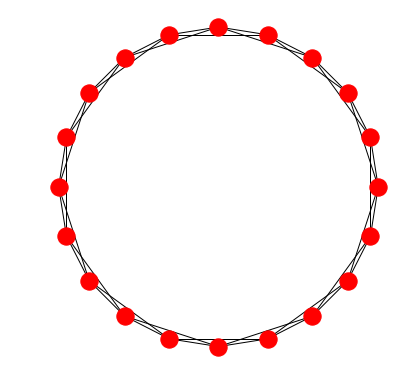

In [30]:
plt.figure(figsize = (5,5))
nx.draw_circular(graph)

In [35]:
graph = nx.watts_strogatz_graph(20,4,0.5)
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 20
Number of edges: 40
Average degree:   4.0000


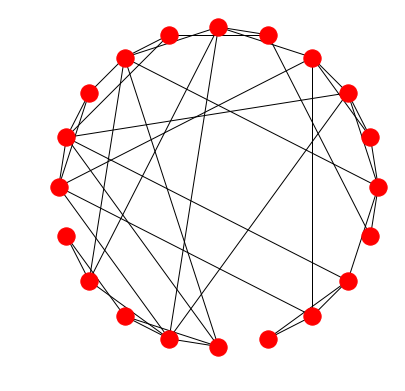

In [32]:
plt.figure(figsize = (5,5))
nx.draw_circular(graph)

## To do

Generate a graph of 10,000 nodes with:
* average degree 20,
* average clustering coefficent larger than 0.5,
* average degree of separation less than 6.

**Hint:** To get an upper bound on the average path length between any pair of distinct nodes, you can consider all paths going through some well chosen node(s). 

In [16]:
graph = nx.watts_strogatz_graph(10000,20,0.1)
print(nx.info(graph))

Name: 
Type: Graph
Number of nodes: 10000
Number of edges: 100000
Average degree:  20.0000


In [17]:
get_clustering_coefficient(nx.to_scipy_sparse_matrix(graph))

0.5144742636413095

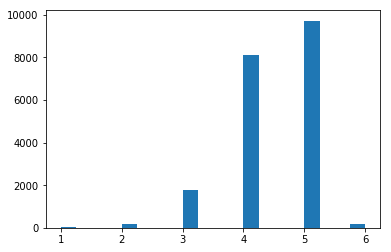

Average degree of separation on 1000 sample : 4.3874


In [40]:
adjacency = nx.to_scipy_sparse_matrix(graph, weight = None)

# Two random airports, uniform sampling
h = []
for i in range(20000):
    nodes = list(graph.nodes())
    u,v = np.random.choice(nodes, size = 2, replace = False)
    h.append(nx.shortest_path_length(graph, u, v))

plt.hist(h, bins = 20)
plt.show()

print("Average degree of separation on 1000 sample :", np.sum(h)/len(h))

In [39]:
dist = get_distances(adjacency, sorted(list(graph.degree), key = lambda x:x[1], reverse = True)[0][0])

mean = (n+1)/(n*(n-1)) *np.sum(dist)
mean

4.118123542354235